<a href="https://colab.research.google.com/github/ancientpi3/Fellowship2022/blob/main/experiments/DCGAN_FID_celebA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab import drive
from google.colab import files
from zipfile import ZipFile
import cv2
import os
from PIL import Image
from keras.initializers import RandomNormal
from google.colab.patches import cv2_imshow
import gc

In [ ]:
!git clone https://github.com/ancientpi3/Fellowship2022.git

Cloning into 'Fellowship2022'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 221 (delta 36), reused 0 (delta 0), pack-reused 140
Receiving objects: 100% (221/221), 2.62 MiB | 4.13 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [ ]:
from Fellowship2022.modules import DCGAN
from Fellowship2022.modules import FID

In [ ]:
drive.mount('/content/gdrive')
filename = "/content/gdrive/MyDrive/celeba_train.zip"
filename = "/content/gdrive/MyDrive/celeba_test.zip"

with ZipFile(filename, "r",) as zip:
  zip.extractall(path="/content/celeba_train")
with ZipFile(filename, "r",) as zip:
  zip.extractall(path="/content/celeba_test")

Mounted at /content/gdrive


In [ ]:
def scoreFID(incep_model,g_model, x_test):
  fake_images = (DCGAN.grab_fake_batch(g_model,FID_test_size))
  real_images = x_test

  fake_images = ((fake_images+1)/2)*255
  real_images = ((real_images+1)/2)*255

  cv2_imshow(fake_images[0])
  cv2_imshow(real_images[0])

  
  fid = FID.calculate_fid(incep_model,real_images,fake_images)
  print("The resulting FID is:", fid)

In [ ]:
def FIDbase(incep_model,x_train,x_test):
  base_images = x_train
  real_images = x_test

  base_images = ((base_images+1)/2)*255
  real_images = ((real_images+1)/2)*255

  cv2_imshow(base_images[0])
  cv2_imshow(real_images[0])

  
  fid = FID.calculate_fid(incep_model,real_images,base_images)
  print("The resulting FID is:", fid)

In [ ]:
folder_path_train="/content/celeba_train"
folder_path_test="/content/celeba_test"
FID_test_size=4000

x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
incep_model = FID.Inception()

87910968/87910968 [==============================] - 3s 0us/step


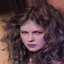

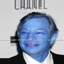

125/125 [==============================] - 14s 115ms/step
The resulting FID is: 6.6684882816434765


28233

In [ ]:
#base FID calculation real images tested against a seperate set of real images
FIDbase(incep_model,x_train,x_test)
gc.collect()

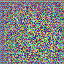

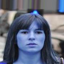

125/125 [==============================] - 14s 113ms/step
The resulting FID is: 399.2971627987329


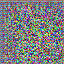

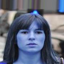

125/125 [==============================] - 14s 113ms/step
The resulting FID is: 398.6847986294813


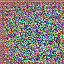

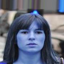

125/125 [==============================] - 14s 114ms/step
The resulting FID is: 400.00211823365805


In [ ]:
#base FID calculation random noise tested against a seperate set of real images
for i in range(3):
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

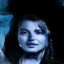

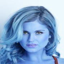

125/125 [==============================] - 15s 119ms/step
The resulting FID is: 55.94628850531542


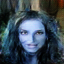

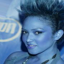

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 55.78131237556512


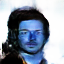

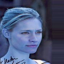

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 56.341361451516406


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_40000_v1.h5")
#Results of trial 1, GAN trained with 40000 training samples
for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

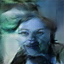

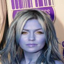

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 58.313615902967236


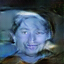

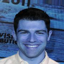

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 57.92079089709892


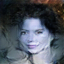

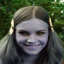

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 58.23474512228954


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_40000_v2.h5")
#Results of trial 2, GAN trained with 40000 training samples
for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

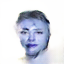

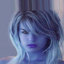

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 55.56464267200388


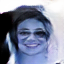

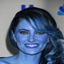

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 54.144781999950276


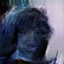

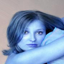

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 55.544924926403


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_40000_v3.h5")
#Results of trial 3, GAN trained with 40000 training samples
for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

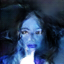

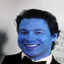

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 59.406297220771336


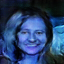

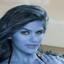

125/125 [==============================] - 16s 125ms/step
The resulting FID is: 58.7462099892629


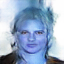

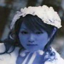

125/125 [==============================] - 14s 111ms/step
The resulting FID is: 58.41385127369592


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_20000_v1.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

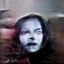

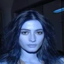

125/125 [==============================] - 13s 107ms/step
The resulting FID is: 57.56940954370561


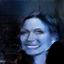

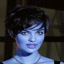

125/125 [==============================] - 13s 108ms/step
The resulting FID is: 57.44208616981419


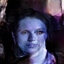

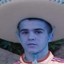

125/125 [==============================] - 14s 114ms/step
The resulting FID is: 58.67916106544696


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_20000_v2.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

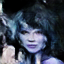

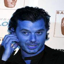

125/125 [==============================] - 15s 122ms/step
The resulting FID is: 58.168851078579955


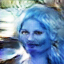

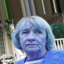

125/125 [==============================] - 14s 114ms/step
The resulting FID is: 59.28366498448279


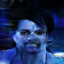

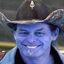

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 57.83490714136653


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_20000_v3.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

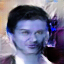

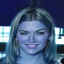

125/125 [==============================] - 15s 123ms/step
The resulting FID is: 63.93304103283703


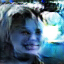

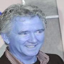

125/125 [==============================] - 16s 125ms/step
The resulting FID is: 63.093170049871304


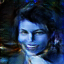

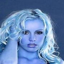

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 62.02895941351851


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_4000_v1.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

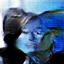

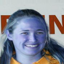

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 93.08601462537477


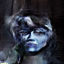

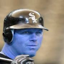

125/125 [==============================] - 16s 125ms/step
The resulting FID is: 92.46609654903222


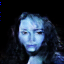

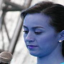

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 93.66823916171313


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_4000_v2.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

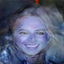

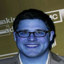

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 68.02910026507287


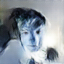

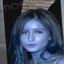

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 67.84904201801265


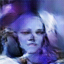

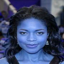

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 68.26356477750306


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_4000_v3.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

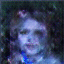

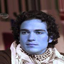

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 247.25768781399026


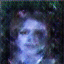

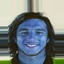

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 248.64908490440666


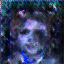

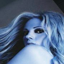

125/125 [==============================] - 16s 125ms/step
The resulting FID is: 246.74588748233407


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_400_v1.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

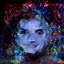

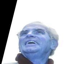

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 209.1693725229671


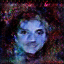

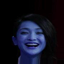

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 208.47279071971133


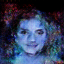

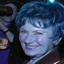

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 209.11718513416406


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_400_v2.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

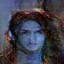

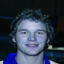

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 216.0332901434412


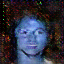

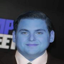

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 217.04974937661675


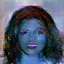

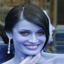

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 215.67335966071903


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_400_v3.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

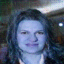

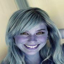

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 179.69003220995498


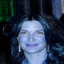

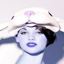

125/125 [==============================] - 14s 114ms/step
The resulting FID is: 180.55131968917647


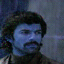

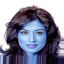

125/125 [==============================] - 15s 123ms/step
The resulting FID is: 179.8821579866305


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_40_v1.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

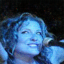

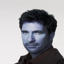

125/125 [==============================] - 15s 121ms/step
The resulting FID is: 195.05630247951694


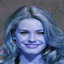

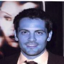

125/125 [==============================] - 15s 123ms/step
The resulting FID is: 198.25054753610175


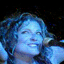

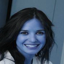

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 196.92304493716193


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_40_v2.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

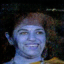

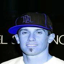

125/125 [==============================] - 15s 123ms/step
The resulting FID is: 200.23244446816537


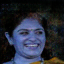

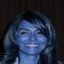

125/125 [==============================] - 15s 124ms/step
The resulting FID is: 202.6795137700894


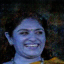

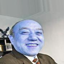

125/125 [==============================] - 16s 125ms/step
The resulting FID is: 199.66537457699354


In [ ]:
g_model = DCGAN.generator()
g_model.load_weights("/content/celeba_generator_40_v3.h5")

for i in range(3):
  x_test = DCGAN.folder_to_numpy(folder_path_test,take=FID_test_size)
  x_train = DCGAN.folder_to_numpy(folder_path_train,take=4000)
  scoreFID(incep_model,g_model,x_test)
  gc.collect()

In [ ]:
from google.colab import runtime
runtime.unassign()
